In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# model = ResNet50(weights='imagenet')


In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

ResourceExhaustedError: OOM when allocating tensor with shape[25088,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]

In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
# 构建不带分类器的预训练模型
base_model = InceptionV3(weights='imagenet')

96124928/96112376 [==============================] - 10s 0us/step


In [1]:
from tensorflow.keras.applications.xception import Xception
base_model = Xception(weights='imagenet')

In [1]:
from tensorflow.keras.applications.resnet import ResNet50
base_model = ResNet50(weights='imagenet')

In [2]:
# from tensorflow.keras.applications.resnet import ResNet101
# base_model = ResNet101(weights='imagenet')

In [3]:
# from tensorflow.keras.applications.resnet import ResNet152
# base_model = ResNet152(weights='imagenet')

In [1]:
# from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
# base_model = InceptionResNetV2(weights='imagenet')


ResourceExhaustedError: failed to allocate memory [Op:AddV2]

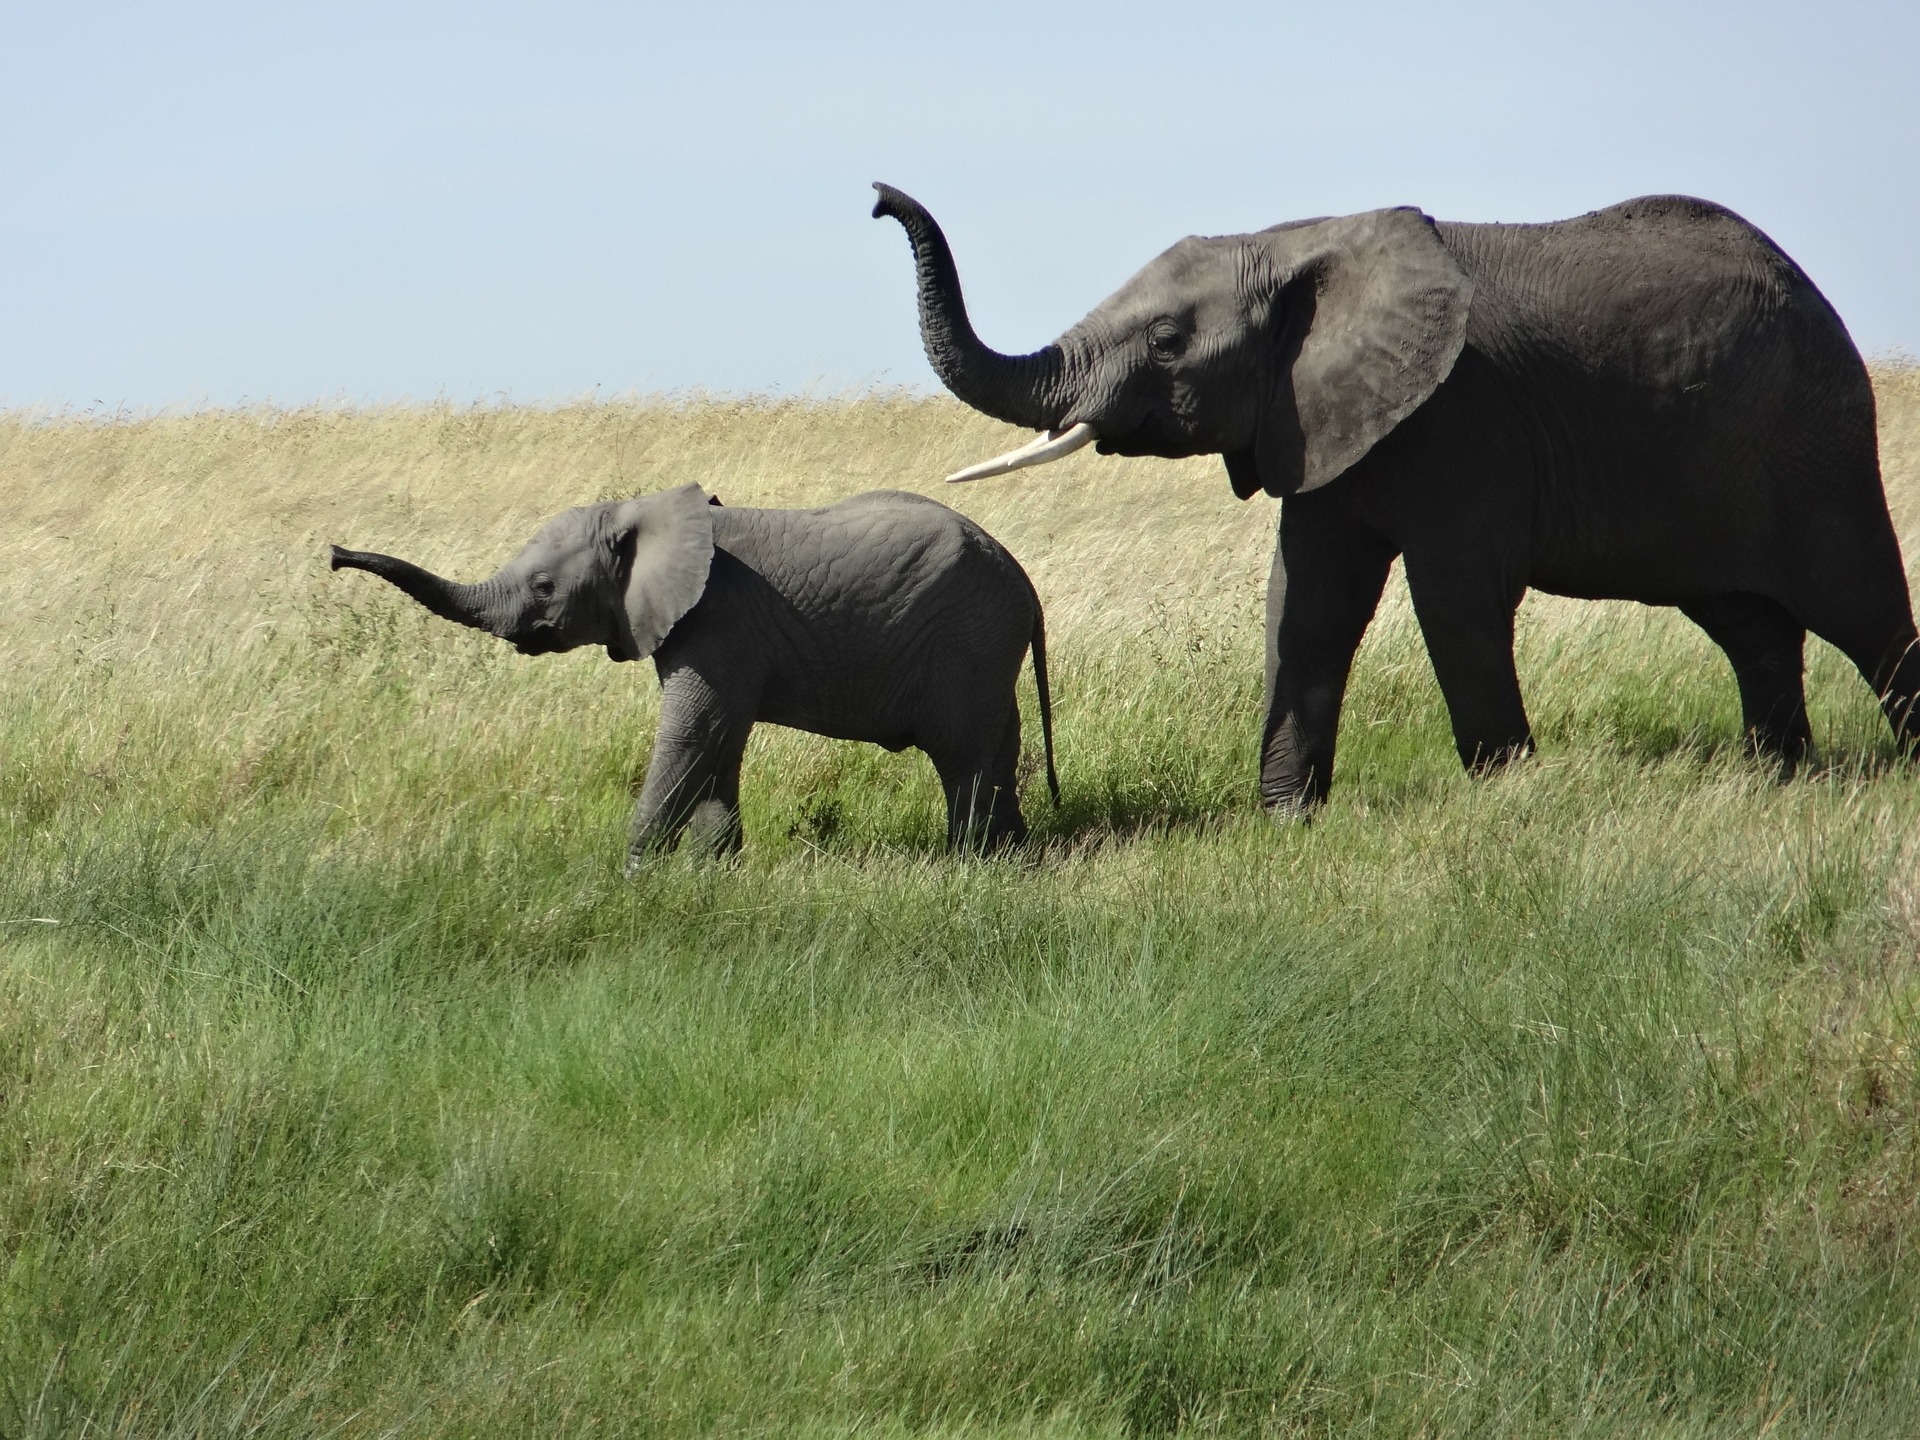

In [2]:
from Integrated_Gradients_algorithm import *
from GradVisualizer import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from IPython.display import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import xception
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "4"
config=tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True   #不全部占满显存, 按需分配
sess=tf.compat.v1.Session(config=config)


# Size of the input image
img_size = (299, 299, 3)

# Load Xception model with imagenet weights
model = xception.Xception(weights="imagenet")

# The local path to our target image
img_path = '/public/liujiawei/huawei/ZHB/ADF-master/elephant.png'
display(Image(img_path))

In [3]:
# 1. Convert the image to numpy array
img = get_img_array(img_path)  # (1, 299, 299, 3)

# 2. Keep a copy of the original image
orig_img = np.copy(img[0]).astype(np.uint8) # (299, 299, 3)

# 3. Preprocess the image
img_processed = tf.cast(xception.preprocess_input(img), dtype=tf.float32)

# 4. Get model predictions
preds = model.predict(img_processed)
top_pred_idx = tf.argmax(preds[0])
print("Predicted:", top_pred_idx, xception.decode_predictions(preds, top=1)[0])

# 5. Get the gradients of the last layer for the predicted label
grads = get_gradients(img_processed, model=model, top_pred_idx=top_pred_idx)  # TensorShape([1, 299, 299, 3])

# 6. Get the integrated gradients
igrads = random_baseline_integrated_gradients(
    np.copy(orig_img), model, top_pred_idx=top_pred_idx, num_steps=50, num_runs=2  #(299, 299, 3)
)

# 7. Process the gradients and plot
vis = GradVisualizer()
vis.visualize(
    image=orig_img,
    gradients=grads[0].numpy(),
    integrated_gradients=igrads.numpy(),
    clip_above_percentile=99,
    clip_below_percentile=0,
)

vis.visualize(
    image=orig_img,
    gradients=grads[0].numpy(),
    integrated_gradients=igrads.numpy(),
    clip_above_percentile=95,
    clip_below_percentile=28,
    morphological_cleanup=True,
    outlines=True,
)

KeyboardInterrupt: 

In [26]:
np.max(grads)

0.034915067

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


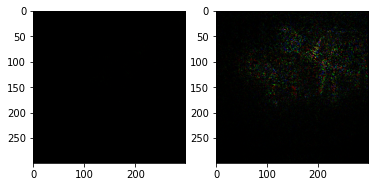

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(121)
plt.imshow(grads[0])
plt.subplot(122)
plt.imshow(igrads)

In [11]:
np.shape(np.copy(orig_img))

(299, 299, 3)

In [12]:
decode_predictions?

Object `decode_predictions` not found.
